# Accumulation, deletion and invertion at the semiocnductor-electrolyte interface

In [159]:
%run -i settings.py
from mtfa import Material, Structure
from IPython import display

params= {'figure.figsize': [5, 2.7]}
plt.rcParams.update(params)

In [3]:
InAs = Material('InAs')
st1 = Structure(InAs, Nd = 1e16, length = 250e-9, n=100)
st2 = Structure(InAs, Nd = 1e16, length = 250e-9, n=100)
st3 = Structure(InAs, Nd = 1e16, length = 250e-9, n=100)

In [4]:
st1.V0 = -0.1
st1.initGuess()
st1.solve()

0:  |F(x)| = 0.000109887; step 1; tol 0.000400322
1:  |F(x)| = 8.03234e-06; step 1; tol 0.00480881
2:  |F(x)| = 6.85456e-07; step 1; tol 0.00655416
3:  |F(x)| = 1.70314e-10; step 1; tol 5.5563e-08
4:  |F(x)| = 4.37109e-16; step 1; tol 5.92817e-12


In [5]:
st2.V0 = 0.1
st2.initGuess()
st2.solve()

0:  |F(x)| = 2.09617e-05; step 1; tol 1.46062e-05
1:  |F(x)| = 4.31664e-07; step 1; tol 0.000381662
2:  |F(x)| = 1.12987e-09; step 1; tol 6.16608e-06
3:  |F(x)| = 1.60977e-14; step 1; tol 1.82689e-10
4:  |F(x)| = 1.78839e-17; step 1; tol 1.11081e-06


In [6]:
st3.V0 = 0.2
st3.initGuess()
st3.solve()

0:  |F(x)| = 7.42001e-05; step 1; tol 4.57237e-05
1:  |F(x)| = 3.11545e-06; step 1; tol 0.00158663
2:  |F(x)| = 9.70713e-09; step 1; tol 8.7374e-06
3:  |F(x)| = 1.82531e-13; step 1; tol 3.18224e-10
4:  |F(x)| = 2.82228e-17; step 1; tol 2.15164e-08


In [7]:
st1.z = - st1.z
st2.z = - st2.z
st3.z = - st3.z

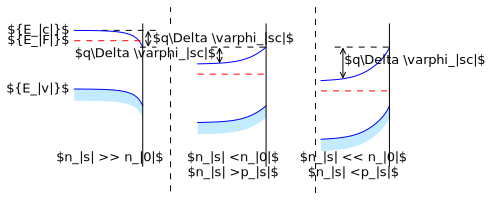

In [170]:
params= {'figure.figsize': [6, 2.7]}
plt.rcParams.update(params)

fill = (0.76,0.92,1)
line = [-0.65,0.2] # vertical border of s/c [y_min, y_max]
fermi = [-250, 0] # fermi energy level [x_min, x_max]
fig = plt.figure()
phi_x1 = fig.add_subplot(131)
phi_x1.plot([-150,50],  [-st1.V0-st1.Ef,-st1.V0-st1.Ef ], 'k--',
            st1.z*1e9, st1.sol - st1.Ef-st1.V0, 'b',
            st1.z*1e9, st1.sol - st1.Ef - st1.Eg-st1.V0, 'b',
            fermi, [-st1.V0,-st1.V0], 'r--',
            [-10,50],  [-st1.Ef,-st1.Ef ], 'k--',
            [0, 0], line, 'k',
#            [50,50], [-0.65,-0.025], 'k--'
           )


phi_x1.fill_between(st1.z*1e9, st1.sol-st1.Eg-st1.Ef-st1.V0,
                    st1.sol-st1.Ef-st1.Eg-.07-st1.V0,
                    edgecolor=(0,0,0,0), facecolor=fill)

phi_x1.set_xlim(-270, 52)
phi_x1.set_ylim(-.7, 0.2)
phi_x1.get_yaxis().set_visible(False)
phi_x1.get_xaxis().set_visible(False)
phi_x1.set_frame_on(False)

phi_x2 = fig.add_subplot(132)
phi_x2.plot(st2.z*1e9, st2.sol - st2.Ef -st2.V0, 'b',
            st2.z*1e9, st2.sol - st2.Ef - st2.Eg -st2.V0, 'b',
#            st2.z*1e9, np.zeros_like(st2.z), 'r--',
            fermi, [-st2.V0,-st2.V0], 'r--',
            [-200,0], [-st2.Ef,-st2.Ef], 'k--',
            [0, 0], line, 'k',
            
            )

phi_x2.fill_between(st2.z*1e9, st2.sol-st2.Eg-st2.Ef-st2.V0,
                    st2.sol-st2.Ef-st2.Eg-.07-st2.V0,
                    edgecolor=(0,0,0,0), facecolor=fill)

phi_x2.set_xlim(phi_x1.get_xlim())
phi_x2.set_ylim(phi_x1.get_ylim())
phi_x2.get_yaxis().set_visible(False)
phi_x2.get_xaxis().set_visible(False)
phi_x2.set_frame_on(False)

phi_x3 = fig.add_subplot(133)
phi_x3.plot(st3.z*1e9, st3.sol - st3.Ef-st3.V0, 'b',
            st3.z*1e9, st3.sol - st3.Ef - st3.Eg-st3.V0, 'b',
            fermi, [-st3.V0,-st3.V0], 'r--',
            [-200,0], [-st3.Ef,-st3.Ef], 'k--',
            [0, 0], line, 'k',
#            [-269,-269], line, 'k--'
            )

phi_x3.fill_between(st3.z*1e9, st3.sol-st3.Eg-st3.Ef-st3.V0,
                    st3.sol-st3.Ef-st3.Eg-.07-st3.V0,
                    edgecolor=(0,0,0,0), facecolor=fill)

phi_x3.set_xlim(phi_x1.get_xlim())
phi_x3.set_ylim(phi_x1.get_ylim())
phi_x3.get_yaxis().set_visible(False)
phi_x3.get_xaxis().set_visible(False)
phi_x3.set_frame_on(False)


phi_x3.text(-1170, -st1.V0, '\${E_|F|}$', va='center', ha='right')
phi_x3.text(-1170, -st1.Ef-st1.V0, '\${E_|c|}$', va='center', ha='right')
phi_x3.text(-1170, -st1.Ef-st1.Eg-st1.V0, '\${E_|v|}$', va='center', ha='right')

phi_x3.text(-1020, -0.6, '\$n_|s| >> n_|0|$', va='center', ha='center')
phi_x3.text(-570, -0.6, '\$n_|s| <n_|0|$', va='center', ha='center')
phi_x3.text(-570, -0.69, '\$n_|s| >p_|s|$', va='center', ha='center')
phi_x3.text(-130, -0.6, '\$n_|s| << n_|0|$', va='center', ha='center')
phi_x3.text(-130, -0.69, '\$n_|s| <p_|s|$', va='center', ha='center')

note = '\$q\\Delta \\varphi_|sc|$'
phi_x3.annotate(
    '', (-170, -st3.Ef-st3.V0), (-170, -st3.Ef+0.01),
    arrowprops={'arrowstyle': '<->'})
phi_x3.text(-165, -(2*st3.Ef+st3.V0)/2+0.02, note, va='center', ha='left')


phi_x2.annotate(
    '', (-170, -st2.Ef-st2.V0-0.01), (-170, -st2.Ef+0.01),
    arrowprops={'arrowstyle': '<->'})

phi_x3.text(-635, -(2*st2.Ef+st2.V0)/2+0.01, note, va='center', ha='right')


phi_x1.annotate(
    '', (20, -st1.Ef-0.01), (20, -st1.V0-st1.Ef+0.01),
    arrowprops={'arrowstyle': '<->'})

phi_x3.text(-865, -(2*st1.Ef+st1.V0)/2, note, va='center', ha='left')

#plt.tight_layout()

line = matplotlib.lines.Line2D([-800,-800], [-0.8,0.06], 
                               color='k', ls='--')
line.set_clip_on(False)
phi_x3.add_line(line)

line2 = matplotlib.lines.Line2D([-270,-270], [-0.81,0.3], 
                               color='k',ls='--')
line2.set_clip_on(False)
phi_x3.add_line(line2)

line3 = matplotlib.lines.Line2D([-800,-800], [0.2,0.3], 
                               color='k', ls='--')
line3.set_clip_on(False)
phi_x3.add_line(line3)

plt.subplots_adjust(wspace= 0.4)
name1 = 'IP_ECV_accum_b'
plt.savefig(name1+'.svg', transparent=True)
plt.show()

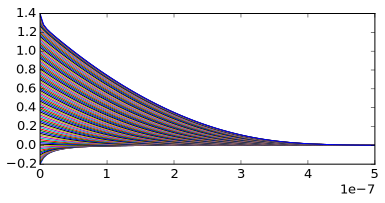

In [9]:
GaAs = Material('GaAs')
st = Structure(GaAs, Nd = 1e16, length = 500e-9, n=100)

st.f_tol = 1e-7
st.x_tol = None

VV = np.linspace(-0.2, 1.4, 99)
F = np.zeros_like(VV)
st.initGuess()
for i, V in enumerate(VV):
    print(V)
    st.V0 = V
    st.solve()
    F[i] = st.F
    plt.plot(st.z, st.sol)
    display.clear_output(wait=False)
    display.display(plt.gcf())
plt.close()

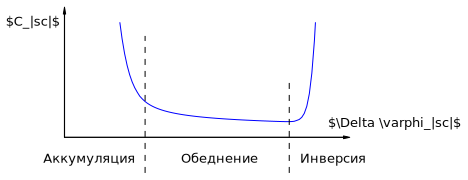

In [166]:
Q = st1.eps[0]*F/1e-2
C = zeros_like(Q[1:])
C = -(Q[:-1]-Q[1:])/(VV[:-1]-VV[1:])
VVV = VV[:-1]+(VV[:-1]-VV[1:])/2
C[18]=0.13

fig = plt.figure()
cv = fig.add_subplot(111)
cv.plot(VVV, C,
       [0.12,0.12], [-0.15, 0.35], 'k--',
       [1.05,1.05], [-0.15, 0.2], 'k--')
cv.set_ylim(-0.15,0.4)
cv.set_xlim(-0.3,1.5)


plt.xticks([])
plt.yticks([])
cv.set_frame_on(False)

plt.arrow(-0.4, -0.02, 1.8, 0, width=0.001, color="k", clip_on=False,
          head_width=0.01, head_length=0.04)
plt.arrow(-0.4, -0.02, 0, 0.45, width=0.001, color="k", clip_on=False,
          head_width=0.015, head_length=0.025)

cv.text(-0.43, 0.4, '\$C_|sc|$', va='center', ha='right')
cv.text(1.3, 0.03, '\$\\Delta \\varphi_|sc|$', va='center', ha='left')

cv.text(0.6, -0.1, 'Обеднение', va='center', ha='center')
cv.text(0.05, -0.1, 'Аккумуляция', va='center', ha='right')
cv.text(1.12, -0.1, 'Инверсия', va='center', ha='left')

name2 = 'IP_ECV_accum_a'
plt.savefig(name2+'.svg', transparent=True)
plt.show()

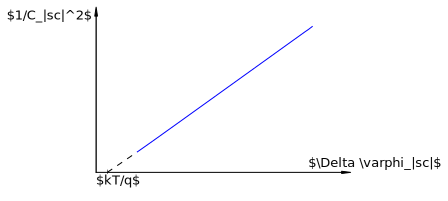

In [168]:
params= {'figure.figsize': [4, 3.2]}
plt.rcParams.update(params)

fig = plt.figure()
cv = fig.add_subplot(111)
cv.plot(VVV[21:70], 1/C[21:70]**2,
       [0,VVV[20]], [0, 1/C[20]**2], 'k--',
       [0,0], [-5,10], 'k')

plt.xticks([])
plt.yticks([])
cv.set_frame_on(False)

plt.arrow(-0.05, -0.02, 1.1, 0, width=0.001, color="k", clip_on=False,
          head_width=10, head_length=0.04)
plt.arrow(-0.05, -0.02, 0, 700, width=0.001, color="k", clip_on=False,
          head_width=0.012, head_length=40)

cv.text(-0.07, 700, '\$1/C_|sc|^2$', va='center', ha='right')
cv.text(0.9, 10, '\$\\Delta \\varphi_|sc|$', va='bottom', ha='left')
cv.text(-0.05,-10, '\$kT/q$', va='top', ha='left')


name3 = 'IP_ECV_mott'
plt.savefig(name3+'.svg', transparent=True)
plt.show()